In [184]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/pre-cog/keys/cases_court_key.csv
/kaggle/input/pre-cog/keys/judge_case_merge_key.csv


In [185]:
case_18 = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2018.csv')
print(case_18.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201900000012018  2018           1          1         1   
1  01-01-01-201900000022018  2018           1          1         1   
2  01-01-01-201900000032018  2018           1          1         1   
3  01-01-01-201900000042018  2018           1          1         1   
4  01-01-01-201900000052018  2018           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000022018  chief judicial magistrate           0 male   
1  MHNB030000032018  chief judicial magistrate           0 male   
2  MHNB030000042018  chief judicial magistrate           0 male   
3  MHNB030000052018  chief judicial magistrate           0 male   
4  MHNB030000062018  chief judicial magistrate    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0       1943        2975.0   
1            0 m

In [186]:
case_18 = case_18[['state_code', 'female_defendant', 'female_petitioner', 'type_name', 'disp_name']]

In [187]:
case_18.reset_index(drop=True)

,state_code,female_defendant,female_petitioner,type_name,disp_name
0,1,0 male,0 male,1943,33
1,1,0 male,0 male,1943,52
2,1,0 male,0 male,1943,52
3,1,0 male,0 male,1943,52
4,1,-9998 unclear,0 male,1943,5
...,...,...,...,...,...
13724294,33,0 male,1 female,3364,25
13724295,33,0 male,0 male,3364,25
13724296,33,0 male,1 female,3364,25
13724297,33,0 male,1 female,3364,25


In [188]:
case_18 = case_18[(case_18['female_defendant'] == '0 male') | (case_18['female_defendant'] == '1 female')]

In [189]:
case_18 = case_18[(case_18['female_petitioner'] == '0 male') | (case_18['female_petitioner'] == '1 female')]

In [190]:
tp = pd.read_csv('/kaggle/input/pre-cog/keys/type_name_key.csv')
print(tp)

       year  type_name          type_name_s  count
0      2010        1.0             (m) t.s.     18
1      2010        2.0                 (sc)      2
2      2010        3.0           ..mact 166     97
3      2010        4.0   04 complaint cases     19
4      2010        5.0     04 criminal case     21
...     ...        ...                  ...    ...
62709  2018     7529.0      xxxxxspl t.ndps      3
62710  2018     7530.0   zila panchayat act    217
62711  2018     7531.0  zilla panchayat act     17
62712  2018     7532.0     zima 457 cr.p.c.      9
62713  2018     7533.0    zimma application     54

[62714 rows x 4 columns]


In [191]:
tp = tp[(tp['year'] == 2018)]

In [192]:
tp = tp[['type_name', 'type_name_s', 'count']]

In [193]:
tp = tp[((tp['type_name'] <= 6732) & (tp['type_name'] >= 6706)) | ((tp['type_name'] <= 6066) & (tp['type_name'] >= 6012) | (tp['type_name'] == 6236)) | (tp['type_name'] == 6241) | (tp['type_name'] == 6298) | (tp['type_name'] == 6299) | (tp['type_name'] == 6300) | (tp['type_name'] == 6309) | (tp['type_name'] == 6312) | (tp['type_name'] == 6649) | (tp['type_name'] == 6643) | ((tp['type_name'] == 6609) | (tp['type_name'] == 6608) | (tp['type_name'] == 6607)) | ((tp['type_name'] == 6617) | (tp['type_name'] == 6516) | (tp['type_name'] == 6615)) | ((tp['type_name'] == 6581) | (tp['type_name'] == 6580) | (tp['type_name'] == 6579) | (tp['type_name'] == 6578) | (tp['type_name'] == 6577) | (tp['type_name'] == 6576) | (tp['type_name'] == 6575)) | ((tp['type_name'] == 6569) | (tp['type_name'] == 6568) | (tp['type_name'] == 6567) | (tp['type_name'] == 6566)) | (tp['type_name'] == 6536) | (tp['type_name'] == 6529) | (tp['type_name'] == 6466) | (tp['type_name'] == 6389) | (tp['type_name'] == 6390)]

In [194]:
tp.reset_index(drop=True)

,type_name,type_name_s,count
0,6012.0,sc,77909
1,6013.0,sc / st (session case),2
2,6014.0,sc and st act,13
3,6015.0,sc and st b.p,12
4,6016.0,sc and st case,77
...,...,...,...
108,6728.0,st sc case,3
109,6729.0,st sc/st,555
110,6730.0,st type 1,56
111,6731.0,st type 2,18


In [195]:
df = case_18.merge(tp, left_on='type_name', right_on='type_name', how='left')
print(df)

         state_code female_defendant female_petitioner  type_name  disp_name  \
0                 1           0 male            0 male       1943         33   
1                 1           0 male            0 male       1943         52   
2                 1           0 male            0 male       1943         52   
3                 1           0 male            0 male       1943         52   
4                 1           0 male          1 female       1943         27   
...             ...              ...               ...        ...        ...   
4373882          33           0 male          1 female       3364         25   
4373883          33           0 male            0 male       3364         25   
4373884          33           0 male          1 female       3364         25   
4373885          33           0 male          1 female       3364         25   
4373886          33           0 male          1 female       3364         16   

        type_name_s  count  
0         

In [196]:
df.dropna(inplace=True)

In [197]:
df.reset_index(drop=True)

,state_code,female_defendant,female_petitioner,type_name,disp_name,type_name_s,count
0,2,1 female,1 female,6012,27,sc,77909.0
1,2,0 male,0 male,6012,27,sc,77909.0
2,2,0 male,0 male,6012,27,sc,77909.0
3,2,0 male,0 male,6012,27,sc,77909.0
4,2,0 male,0 male,6012,4,sc,77909.0
...,...,...,...,...,...,...,...
113470,29,1 female,0 male,6012,27,sc,77909.0
113471,29,1 female,1 female,6012,27,sc,77909.0
113472,29,0 male,0 male,6012,27,sc,77909.0
113473,31,0 male,0 male,6020,33,sc cri.bail appln.,46.0


In [198]:
df.drop(columns=['type_name'], axis=1, inplace=True)

In [199]:
state = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')
print(state)

     year  state_code      state_name pc11_state_name  pc11_state_id
0    2018           2  Andhra Pradesh  andhra pradesh             28
1    2011           2  Andhra Pradesh  andhra pradesh             28
2    2011          29       Telangana  andhra pradesh             28
3    2010          29       Telangana  andhra pradesh             28
4    2014           2  Andhra Pradesh  andhra pradesh             28
..    ...         ...             ...             ...            ...
282  2010          16     West Bengal     west bengal             19
283  2017          16     West Bengal     west bengal             19
284  2013          16     West Bengal     west bengal             19
285  2014          16     West Bengal     west bengal             19
286  2015          16     West Bengal     west bengal             19

[287 rows x 5 columns]


In [200]:
state = state[(state['year'] == 2018)]

In [201]:
state.drop(columns=['year', 'pc11_state_name', 'pc11_state_id'], axis=1, inplace=True)

In [202]:
df1 = df.merge(state, left_on='state_code', right_on='state_code', how='left')

In [203]:
print(df1)

        state_code female_defendant female_petitioner  disp_name  \
0                2         1 female          1 female         27   
1                2           0 male            0 male         27   
2                2           0 male            0 male         27   
3                2           0 male            0 male         27   
4                2           0 male            0 male          4   
...            ...              ...               ...        ...   
113470          29         1 female            0 male         27   
113471          29         1 female          1 female         27   
113472          29           0 male            0 male         27   
113473          31           0 male            0 male         33   
113474          31         1 female            0 male         33   

               type_name_s    count      state_name  
0                       sc  77909.0  Andhra Pradesh  
1                       sc  77909.0  Andhra Pradesh  
2                    

In [204]:
disp = pd.read_csv('/kaggle/input/pre-cog/keys/disp_name_key.csv')
print(disp)

     year  disp_name  disp_name_s   count
0    2010          1     258 crpc   15765
1    2010          2       abated   22021
2    2010          3    absconded   16773
3    2010          4    acquitted  406015
4    2010          5      allowed  244023
..    ...        ...          ...     ...
457  2018         48       stayed     185
458  2018         49  transferred  394249
459  2018         50  uncontested     575
460  2018         51      untrace   29986
461  2018         52    withdrawn  221903

[462 rows x 4 columns]


In [205]:
disp = disp[(disp['year'] == 2018)]

In [206]:
disp.drop(columns=['year', 'count'], axis=1, inplace=True)

In [207]:
dff = df1.merge(disp, left_on='disp_name', right_on='disp_name', how='left')

In [208]:
print(dff)

        state_code female_defendant female_petitioner  disp_name  \
0                2         1 female          1 female         27   
1                2           0 male            0 male         27   
2                2           0 male            0 male         27   
3                2           0 male            0 male         27   
4                2           0 male            0 male          4   
...            ...              ...               ...        ...   
113470          29         1 female            0 male         27   
113471          29         1 female          1 female         27   
113472          29           0 male            0 male         27   
113473          31           0 male            0 male         33   
113474          31         1 female            0 male         33   

               type_name_s    count      state_name              disp_name_s  
0                       sc  77909.0  Andhra Pradesh  disposition var missing  
1                       s

In [209]:
dff.drop(columns=['state_code', 'female_petitioner', 'disp_name', 'count'], axis=1, inplace=True)
print(dff)

       female_defendant         type_name_s      state_name  \
0              1 female                  sc  Andhra Pradesh   
1                0 male                  sc  Andhra Pradesh   
2                0 male                  sc  Andhra Pradesh   
3                0 male                  sc  Andhra Pradesh   
4                0 male                  sc  Andhra Pradesh   
...                 ...                 ...             ...   
113470         1 female                  sc       Telangana   
113471         1 female                  sc       Telangana   
113472           0 male                  sc       Telangana   
113473           0 male  sc cri.bail appln.   Diu and Daman   
113474         1 female  sc cri.bail appln.   Diu and Daman   

                    disp_name_s  
0       disposition var missing  
1       disposition var missing  
2       disposition var missing  
3       disposition var missing  
4                     acquitted  
...                         ...  
11347

In [210]:
data_s = dff.groupby(['state_name', 'female_defendant'])['type_name_s'].count().reset_index()
print(data_s)

           state_name female_defendant  type_name_s
0      Andhra Pradesh           0 male          360
1      Andhra Pradesh         1 female          290
2               Assam           0 male           21
3               Assam         1 female            6
4               Bihar           0 male         2179
5               Bihar         1 female          114
6          Chandigarh           0 male           15
7        Chhattisgarh           0 male            3
8               Delhi           0 male           89
9               Delhi         1 female            3
10      Diu and Daman           0 male            1
11      Diu and Daman         1 female            1
12            Gujarat           0 male           36
13            Gujarat         1 female            1
14            Haryana           0 male          369
15            Haryana         1 female            8
16   Himachal Pradesh         1 female            1
17  Jammu and Kashmir           0 male           15
18  Jammu an

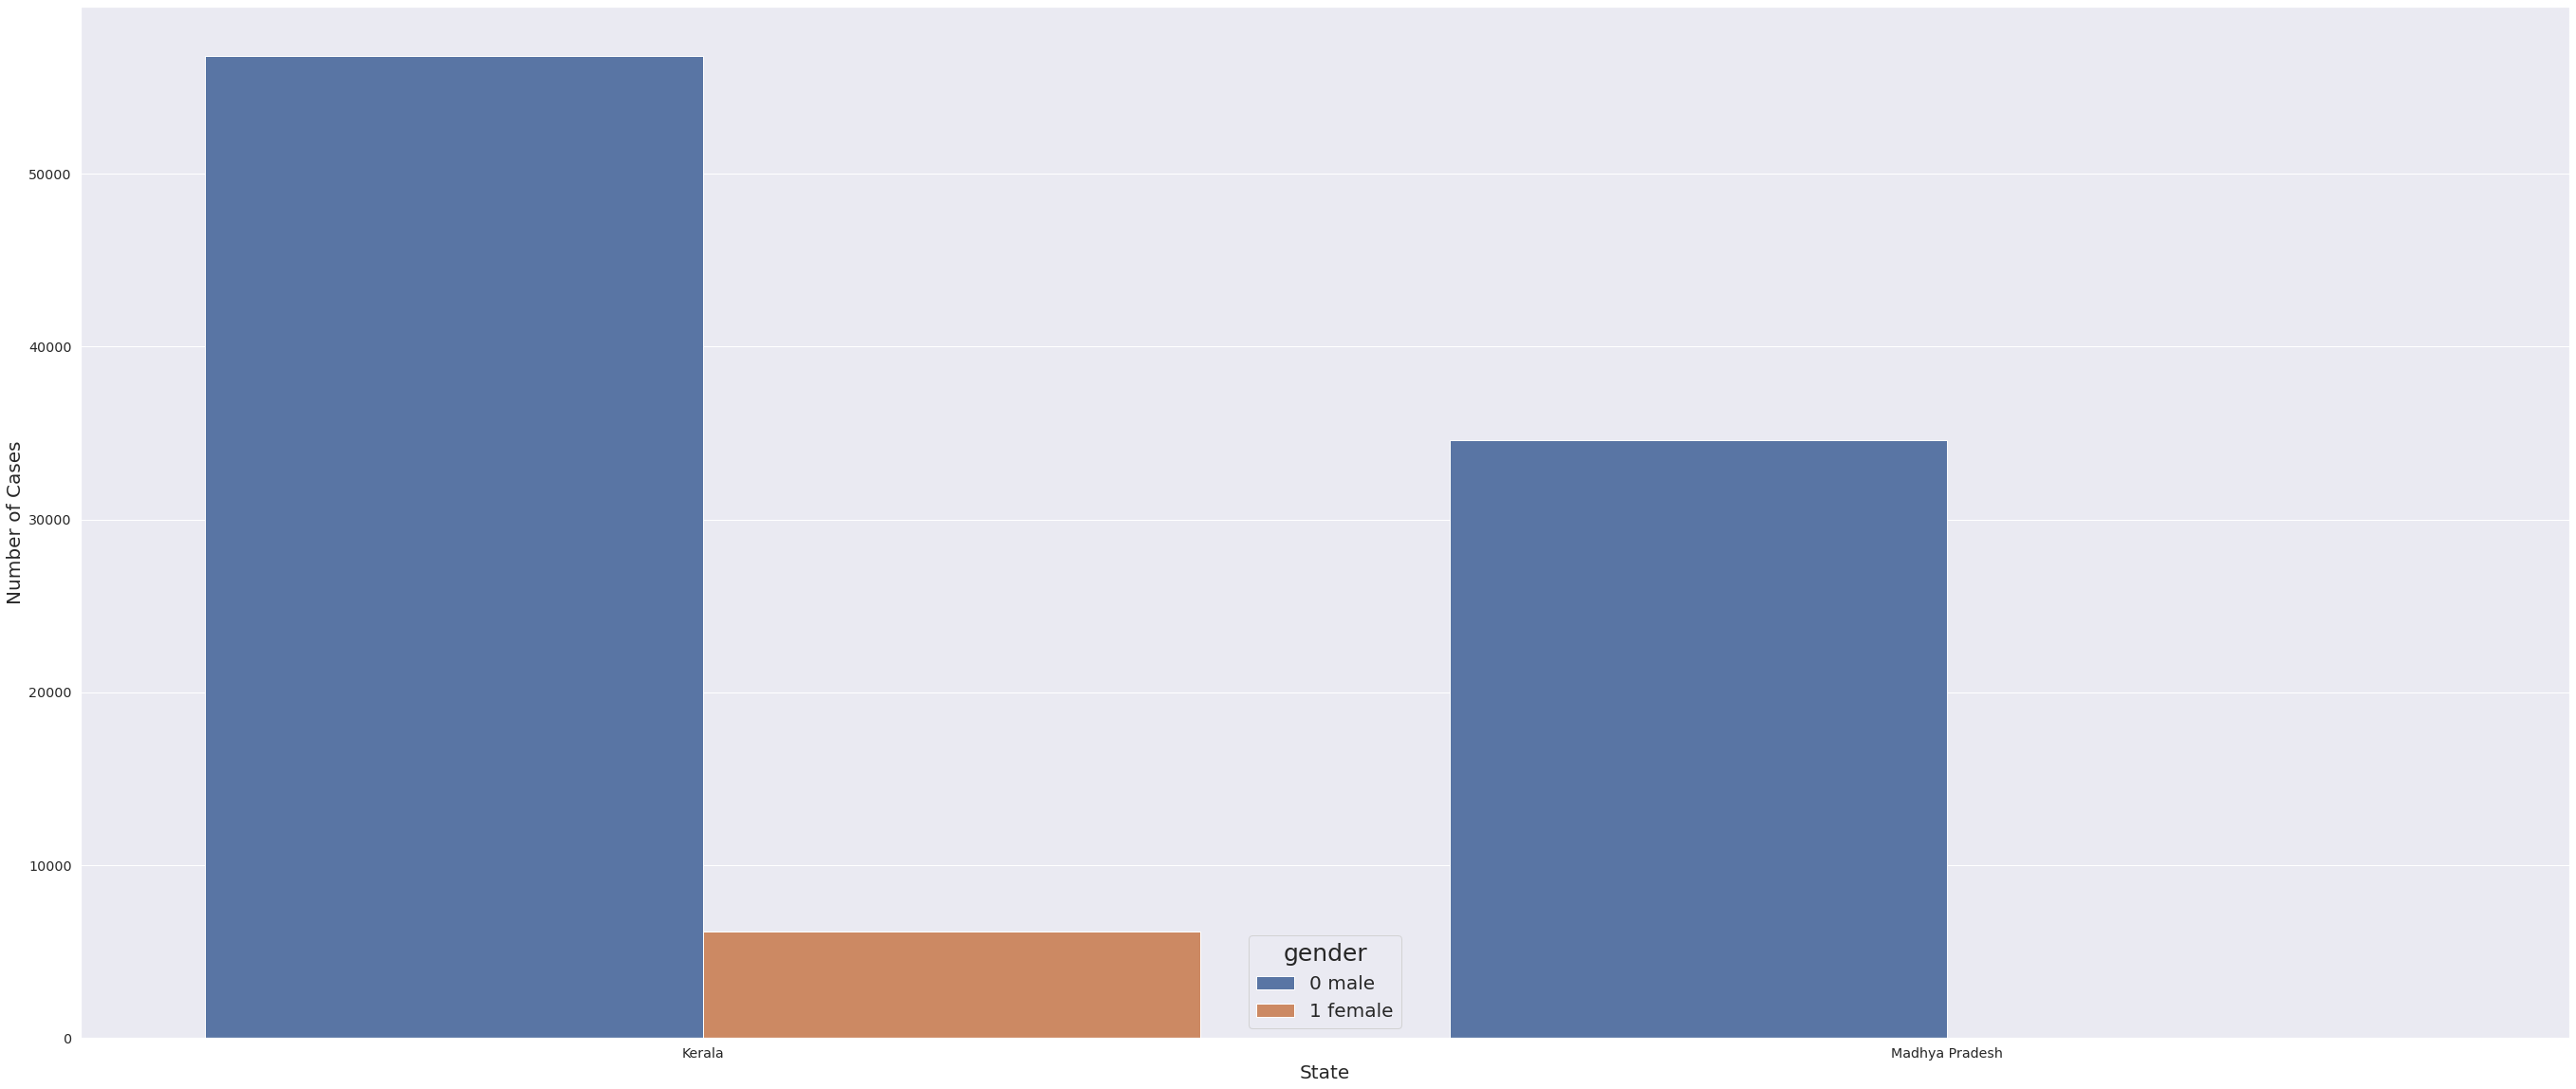

In [211]:
sns.set(font_scale=1.3)
fig = plt.pyplot.figure(figsize = (47,20))
fig = sns.barplot(data=data_s, x= data_s.iloc[23:26,0], y="type_name_s", hue="female_defendant")
plt.pyplot.legend(title='gender', title_fontsize=25, fontsize = 20)
plt.pyplot.xlabel(xlabel = 'State',fontsize = 20)
plt.pyplot.ylabel(ylabel = 'Number of Cases',fontsize = 20)
plt.pyplot.savefig('caste_crimes_with_outlier.png')

In [212]:
data_s.drop([23,24,25,26], inplace=True, axis=0)

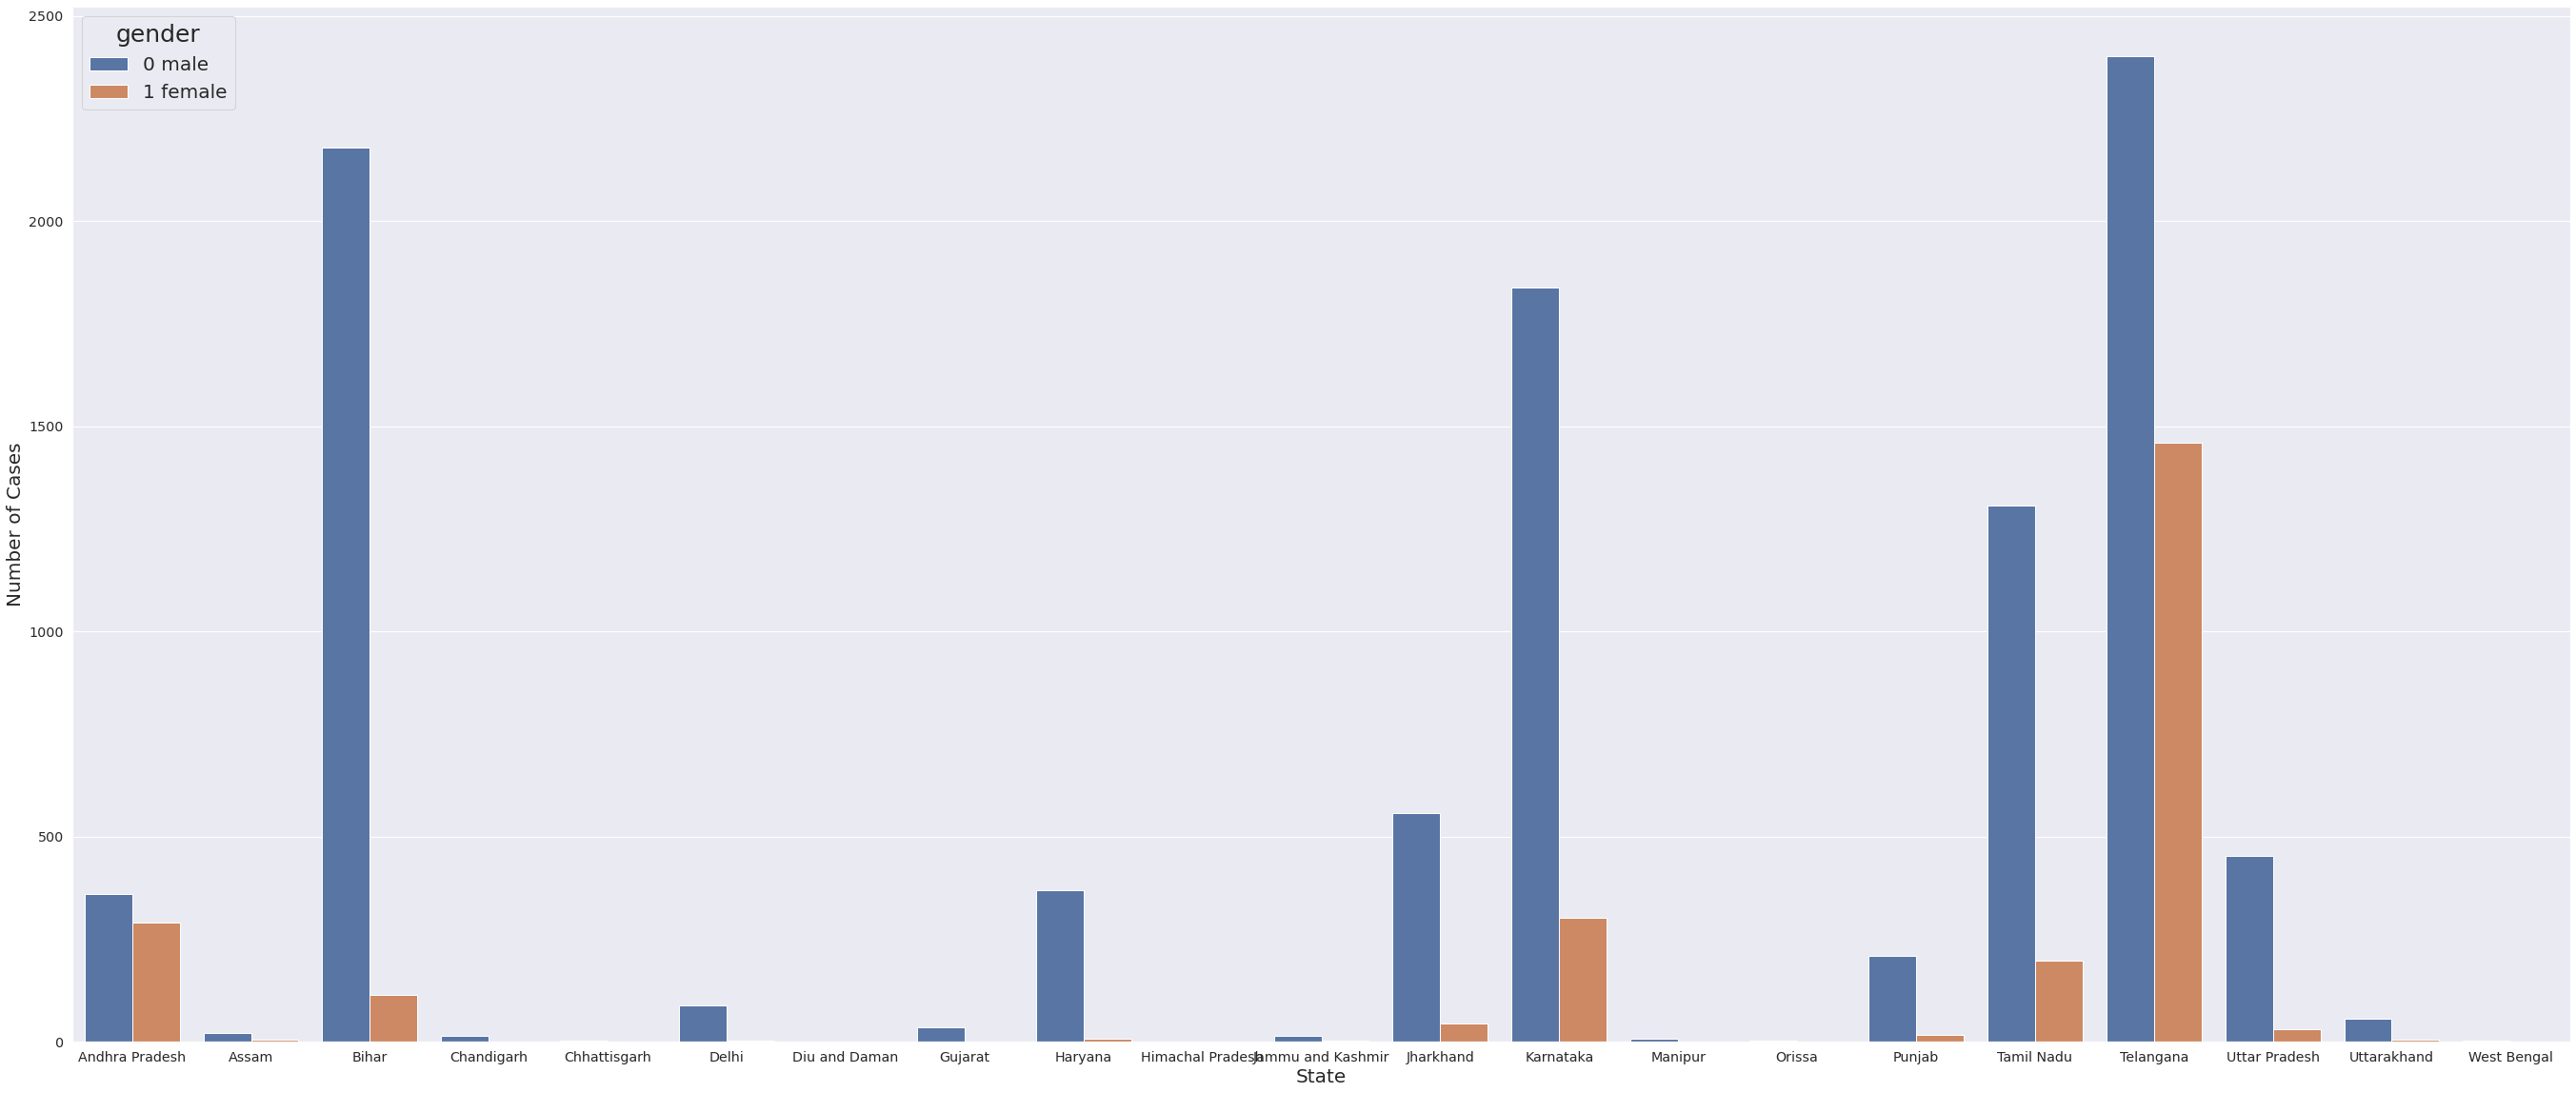

In [213]:
sns.set(font_scale=1.3)
fig = plt.pyplot.figure(figsize = (47,20))
fig = sns.barplot(data=data_s, x="state_name", y="type_name_s", hue="female_defendant")
plt.pyplot.legend(title='gender', title_fontsize=25, fontsize = 20)
plt.pyplot.xlabel(xlabel = 'State',fontsize = 20)
plt.pyplot.ylabel(ylabel = 'Number of Cases',fontsize = 20)
plt.pyplot.savefig('caste_crimes_without_outlier.png')